# 4_Sum_Switches_Per_Month.

Sum the counts of switches found per month.

# Importing libraries and modules.

In [9]:
# importing the librarIES
import os                           # For file processing.
import csv
import pandas as pd            # For dataframes.
from pathlib import Path
import pyodbc                       # For connecting to SQL Server
import datetime
import numpy
import psutil 
import gc
import hashlib
    
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
    
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline
   

# Set values for the various file extension types.

In [15]:
out_file_type = ".csv"

# Set values for the various file prefixes.
merged_file_prefix = "Policy_Fund_Agg_"

# Input data
Switches_By_Month = r"C:/Users/m033\\MSc\\Big_Data_Project\\data\azure/Switches_By_Month.csv"

# Output data
Sum_Switches_By_Month = 'C:/Users/m033\\MSc\\Big_Data_Project\\data\\azure/Sum_Switches_By_Month.csv'


# 1. Read back in the full history of switches.

In [16]:
# Read the data into a pandas dataframe
# File names
df_switches = pd.read_csv(Switches_By_Month, delimiter=',',low_memory=False, header=0)
df_switches.head(10)

,POL_NUMB,API_TRANCHE_EXT,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
0,001045160#,132935.5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,001045178#,17894.8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,001046154#,7669.3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,001047062#,2556.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,001049026#,2556.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,001050063#,7669.2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,001050203#,20656.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,001052119#,7669.2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,001056186#,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,001056204#,15338.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 2. Create a dataframe of the sum of switches per month.

In [17]:
# create a dataframe
df_switch_counts = pd.DataFrame({'Date': ['2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08', '2022-09','2022-10', '2022-11','2022-12','2023-01','2023-02','2023-03'], 
                      'Num_Switches': [df_switches['2022-02'].values.sum(),
                                       df_switches['2022-03'].values.sum(),
                                       df_switches['2022-04'].values.sum(),
                                       df_switches['2022-05'].values.sum(),
                                       df_switches['2022-06'].values.sum(),
                                       df_switches['2022-07'].values.sum(),
                                       df_switches['2022-08'].values.sum(),
                                       df_switches['2022-09'].values.sum(),
                                       df_switches['2022-10'].values.sum(),
                                       df_switches['2022-11'].values.sum(),
                                       df_switches['2022-12'].values.sum(),
                                       df_switches['2023-01'].values.sum(),
                                       df_switches['2023-02'].values.sum(),
                                       df_switches['2023-03'].values.sum()]}) 
# show the dataframe
df_switch_counts


,Date,Num_Switches
0,2022-02,5445
1,2022-03,5271
2,2022-04,4812
3,2022-05,4319
4,2022-06,4201
5,2022-07,4493
6,2022-08,147509
7,2022-09,8241
8,2022-10,1963
9,2022-11,5715


# 3. Plot the switch counts

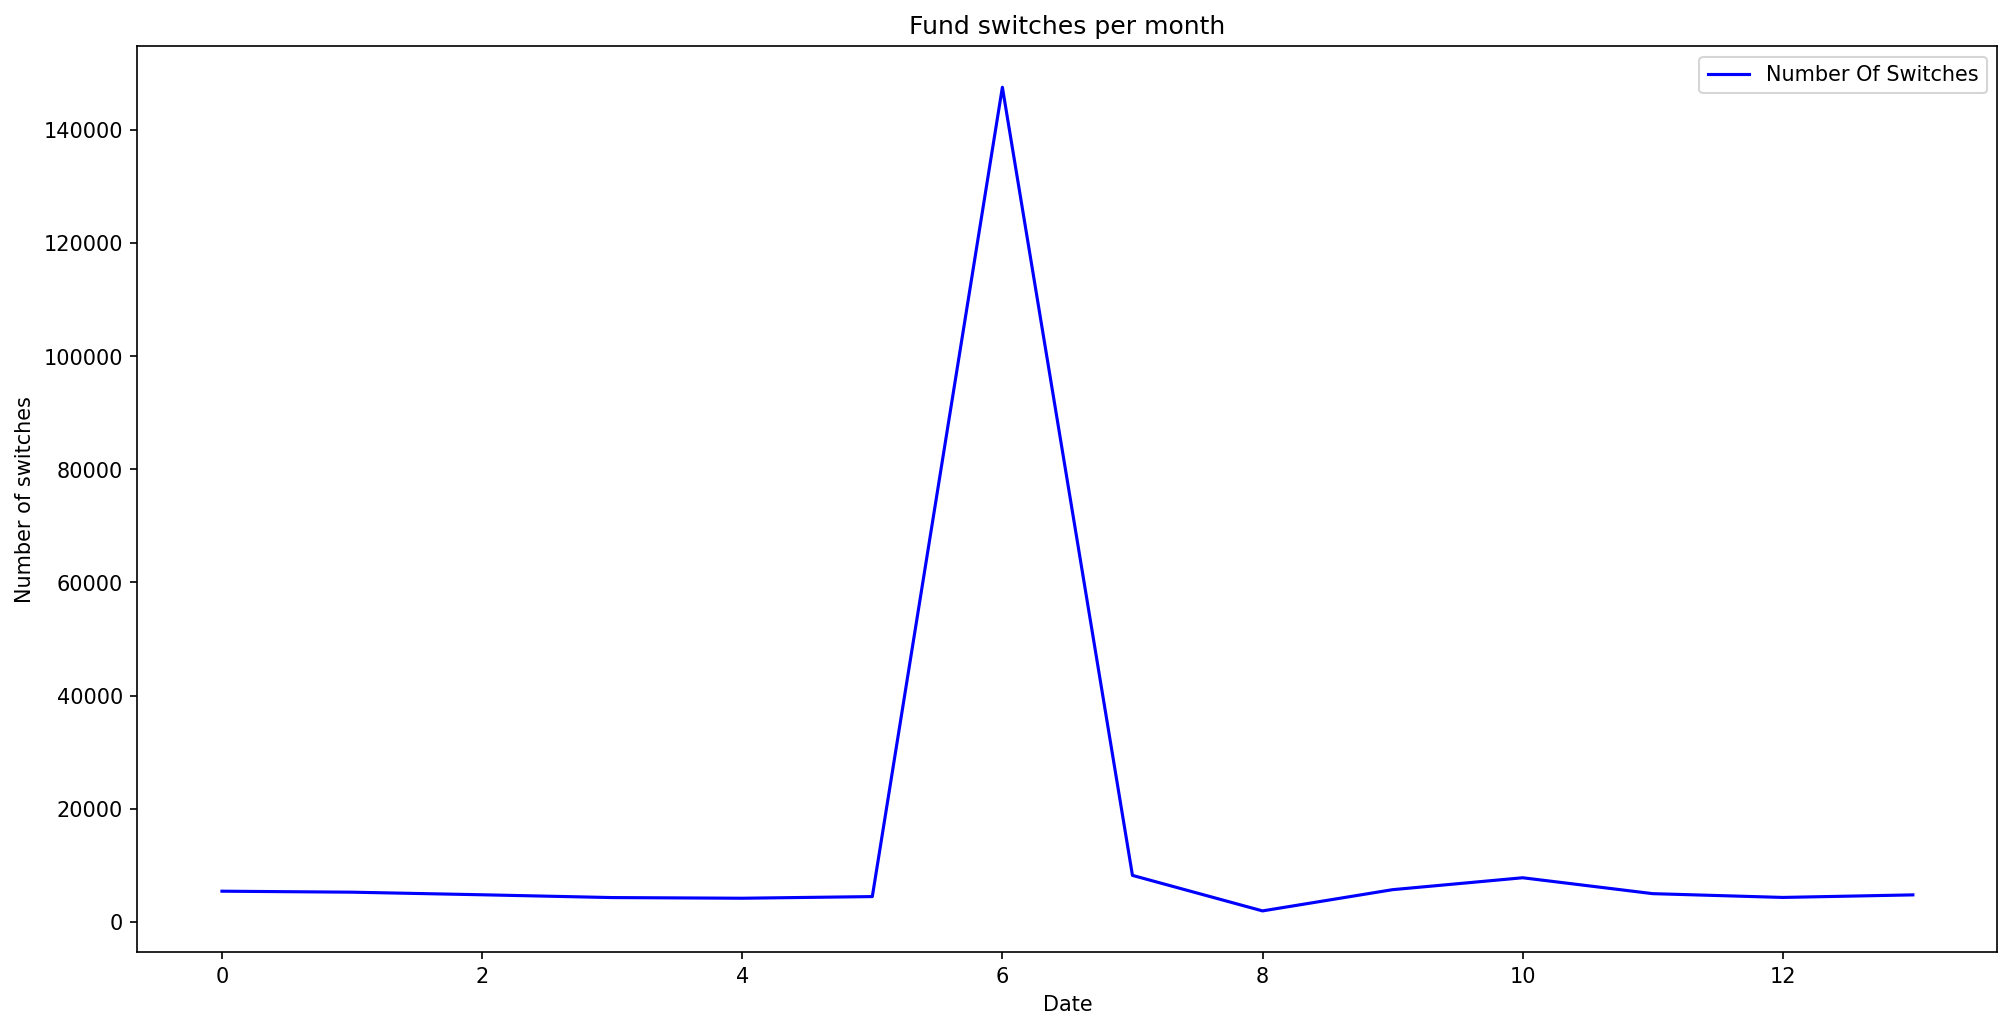

In [18]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

df_switch_counts['Num_Switches'].plot(label='Number Of Switches', color='blue')
#plt.xticks(rotation='vertical')

# adding title to the plot
plt.title('Fund switches per month')

# adding Label to the x-axis
plt.xlabel('Date')
plt.ylabel('Number of switches')
  
# adding legend to the curve
plt.legend()


# 4. Write out the summarised switches for future use.

In [20]:
# Write to a csv file and use index=false to drop teh index from the dataframe
df_switch_counts.to_csv(Sum_Switches_By_Month, encoding='utf-8', index=False)
